In [1]:
# Libraries

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Loading the data set

For this basic project, we'll work with the **Fashion MNIST** data set (more recommanded than the Digits MNIST data set).

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

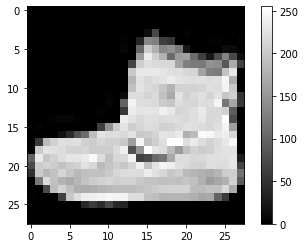

This example belongs to the class : Ankle boot


In [4]:
# Overview of a training example

plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.show()

print('This example belongs to the class : {}'.format(class_names[train_labels[0]]))

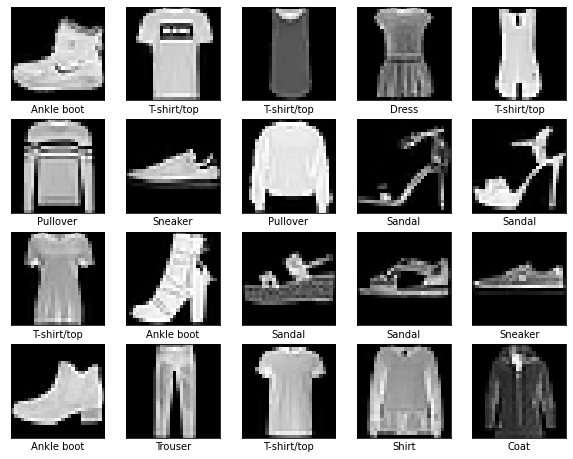

In [5]:
# Display training set images with labels to have a better overview of the train set

plt.figure(figsize=(10,10))
for i in range (20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Quick pre-processing

In [6]:
# Normalize data

train_images = train_images/255.0
test_images = test_images/255.0

## Model

In [7]:
# Create a basic model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Callbacks

It is possible to make actions while the model is training on the data, at the beginning or at the end of an epoch for example.<br />
Here we create a callback class to print a message after each epoch *(just a test)*

In [8]:
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("\nEnd epoch {} of training; accuracy: {}\n".format(epoch, logs["accuracy"]))

In [9]:
n_epochs = 30
history = model.fit(train_images, train_labels,
                    epochs=n_epochs,
                    validation_data = (test_images, test_labels),
                    callbacks=[CustomCallback()])

Epoch 1/30
1864/1875 [============================>.] - ETA: 0s - loss: 0.4969 - accuracy: 0.8242
End epoch 0 of training; accuracy: 0.824150025844574

1875/1875 [==============================] - 2s 967us/step - loss: 0.4965 - accuracy: 0.8242 - val_loss: 0.4081 - val_accuracy: 0.8542
Epoch 2/30
1868/1875 [============================>.] - ETA: 0s - loss: 0.3725 - accuracy: 0.8653
End epoch 1 of training; accuracy: 0.8652666807174683

1875/1875 [==============================] - 2s 911us/step - loss: 0.3726 - accuracy: 0.8653 - val_loss: 0.3743 - val_accuracy: 0.8635
Epoch 3/30
1854/1875 [============================>.] - ETA: 0s - loss: 0.3333 - accuracy: 0.8788
End epoch 2 of training; accuracy: 0.8789499998092651

1875/1875 [==============================] - 2s 919us/step - loss: 0.3335 - accuracy: 0.8789 - val_loss: 0.3810 - val_accuracy: 0.8635
Epoch 4/30
1826/1875 [============================>.] - ETA: 0s - loss: 0.3097 - accuracy: 0.8857
End epoch 3 of training; accuracy: 0.88

Epoch 30/30
1872/1875 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9457
End epoch 29 of training; accuracy: 0.9456833600997925

1875/1875 [==============================] - 3s 1ms/step - loss: 0.1444 - accuracy: 0.9457 - val_loss: 0.4029 - val_accuracy: 0.8890


## Overfitting

We did a lot of epochs (30).<br />
We plot the curves of both the accuracy and the loss computed on the training and the validation set, just to highlight the overfitting, occuring here around the 10th epoch.<br />
In fact, the loss on the training set is going up again, due to the fact that the model "memorized" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

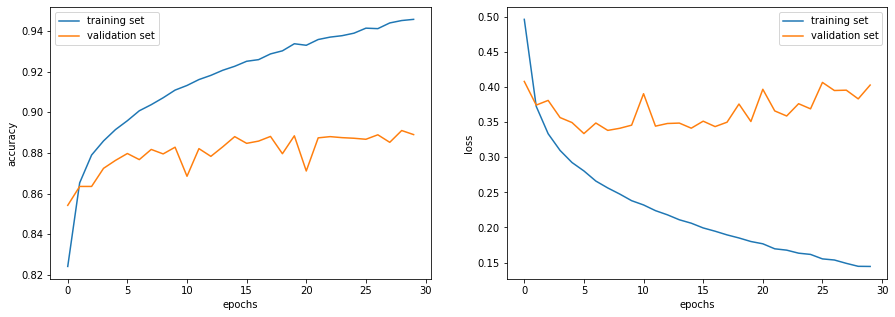

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(np.arange(n_epochs), history.history['accuracy'], label='training set')
plt.plot(np.arange(n_epochs), history.history['val_accuracy'], label='validation set')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(n_epochs), history.history['loss'], label='training set')
plt.plot(np.arange(n_epochs), history.history['val_loss'], label='validation set')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [11]:
# Evaluate the model on the test set

loss_value, metrics_value = model.evaluate(test_images, test_labels)
print('Accuracy : {}'.format(metrics_value))
print('Loss : {}'.format(loss_value))

313/313 [==============================] - 0s 743us/step - loss: 0.4029 - accuracy: 0.8890
Accuracy : 0.8889999985694885
Loss : 0.4028950333595276


In [12]:
# Model's "confidence" that the image corresponds to each of the 10 different classes

probability_model = keras.Sequential([model, keras.layers.Softmax()])

pred_logits = model.predict(test_images)
pred_probs = probability_model.predict(test_images)

print('Model\'s "confidence" that the image corresponds to each of the 10 different classes :\n\n{}'.format(pred_probs[0]))

# Predicted class
print('\nArgmax : {} corresponding to the class : {}'.format(np.argmax(pred_probs[0]), class_names[np.argmax(pred_probs[0])]))

Model's "confidence" that the image corresponds to each of the 10 different classes :

[1.1925059e-12 1.4452088e-10 1.0212751e-13 2.1784250e-15 1.2768599e-14
 3.4896996e-07 5.2993382e-17 1.5648374e-04 1.9540688e-15 9.9984312e-01]

Argmax : 9 corresponding to the class : Ankle boot


## Data Viz

Creating functions to better visualize the correct and wrong predictions of the model.

In [13]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]

    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#9D9D9D")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

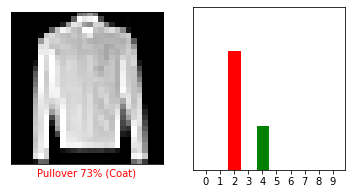

In [14]:
# Viz for one specific prediction

# Colors : correct predictions in green and incorrect predictions in red.

i = 1028
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred_probs[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred_probs[i],  test_labels)
plt.show()

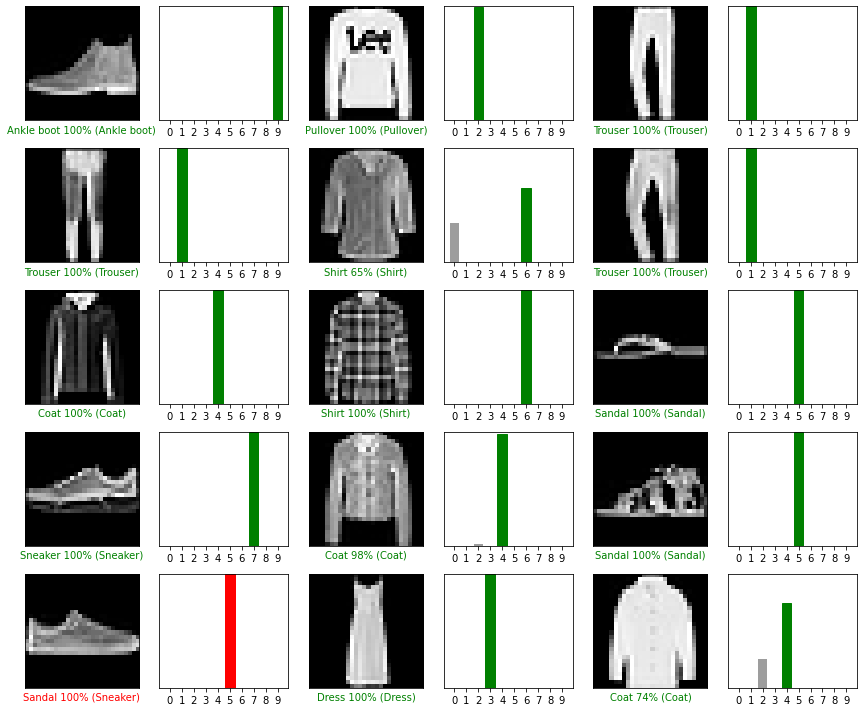

In [15]:
# Plot the first X test images, their predicted labels, and the true labels.

# Colors : correct predictions in green and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred_probs[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred_probs[i], test_labels)
plt.tight_layout()
plt.show()

We'll now use the trained model to make a prediction about a single image.

#### WARNING

tf.keras models are optimized to make predictions on a batch of examples at once.
Accordingly, even though we're using a single image, we need to add it to a list.

Image taken for this test :


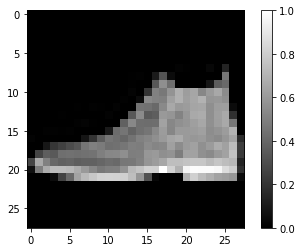

Originally : img.shape = (28, 28)
After adding it to a list : img.shape = (1, 28, 28)


In [16]:
img = test_images[0]

print('Image taken for this test :')
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

print('Originally : img.shape = {}'.format(img.shape))

img = np.expand_dims(img,0)
print('After adding it to a list : img.shape = {}'.format(img.shape))

In [17]:
pred_single_img = probability_model.predict(img)
print('Class predicted : {}'.format(class_names[np.argmax(pred_single_img)]))

Class predicted : Ankle boot


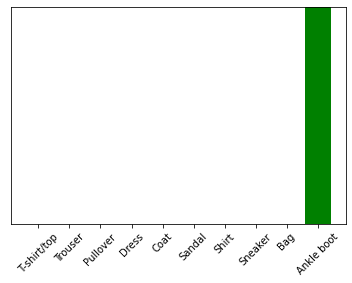

In [18]:
# Verification with data viz

plot_value_array(0, pred_single_img[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)